Importing the libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

Data Collection and processing

In [2]:
# loading the csv data to Pandas DataFrame
gold_data = pd.read_csv('gold_price_data.csv')

In [3]:
# print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting some bascis informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [14]:
gold_data1= gold_data.drop(columns='Date', axis=1)

In [17]:
correlation=gold_data1.corr()

<Axes: >

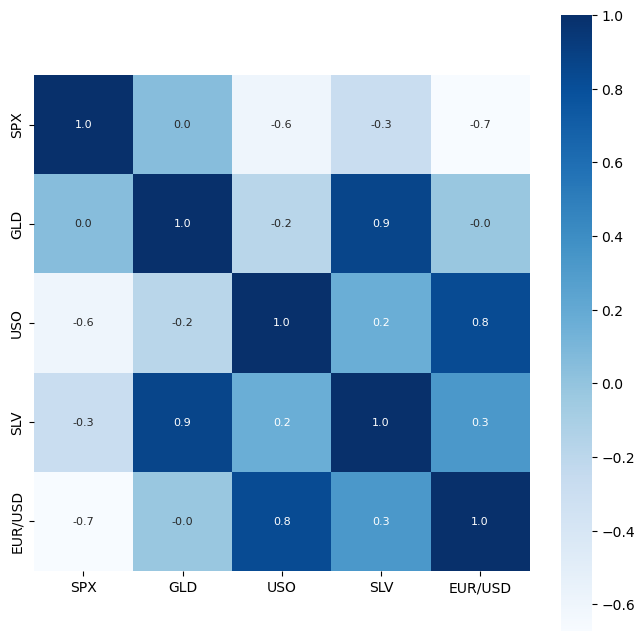

In [29]:
# constructing a heat map to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,cmap='Blues',annot_kws={'size':8})

In [30]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\pavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


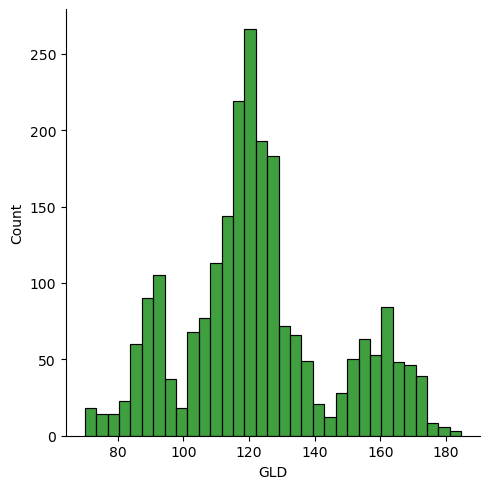

In [31]:
# check the distribution of gold price
sns.displot(gold_data['GLD'],color='g')

Splitting the Feature and Target

In [32]:
X = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [33]:
print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [42]:
regressor = RandomForestRegressor(n_estimators = 100)

In [43]:
# training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
# prediction on Train data
train_data_prediction = regressor.predict(X_train)
print("Accuracy score for Train data:", train_data_prediction)

Accuracy score for Train data: [109.91099786 114.91530077  90.48689998 ... 130.83749675 159.78269624
 114.79909974]


In [47]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print("Accuracy score for Test data:", test_data_prediction)

Accuracy score for Test data: [168.35969972  81.93330004 116.16980038 127.81130092 120.60410129
 154.74939784 150.47879863 125.89750033 117.54219879 125.98740095
 116.57400107 170.92190075 141.45199865 167.51269846 115.34700025
 117.56290036 138.99660372 169.92360024 160.02570346 158.11469932
 155.14930003 125.44730006 176.6885     157.29040346 125.25830042
  93.65759981  77.10419998 120.42629983 119.06819911 167.54009937
  88.04000065 125.07050014  91.2500005  117.76240016 121.17519926
 136.38860128 115.51700129 114.90040105 146.44989899 107.07060066
 104.3336024   87.25579811 126.50430059 118.10370007 153.46639897
 119.69449993 108.21419966 108.08229861  93.19350059 127.14239815
  74.63080073 113.59019932 121.17200011 111.34609942 118.93169906
 120.72369944 160.3605996  166.78360151 146.86889644  85.88519868
  94.34870053  86.93689874  90.43530012 118.93770104 126.38310068
 127.82630056 168.96220095 122.3605989  117.45709915  98.38820054
 168.49060122 142.99259832 131.95820199 121.20

In [48]:
# R square error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Sqaured error: ", error_score)

R Sqaured error:  0.9893376824918263


Compare actual values and predicted values in a plot

In [49]:
y_test = list(y_test)

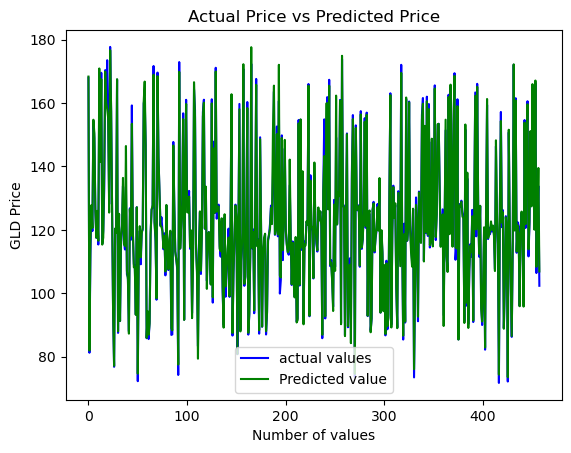

In [50]:
plt.plot(y_test, color='blue', label = "actual values")
plt.plot(test_data_prediction, color='green', label = "Predicted value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()